## TMDb Movie Data Analysis

## Introduction

In this project I will work on the data analysis process including 1-Asking questions. 2-Wrangling Steps:Data Assessing and Data Cleaning. 3-Explore the data. 4-Draw Conclusions. 5-Communicate.
So in general, I will  investigat the dataset of TMDb movies and I will answer the following questions:
Q1 What is the genre that has the highst average profit ?
Q2 What is the movie that has the highst average vote ?
Q3 What is the genre that has the highst average vote ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('tmdb-movies.csv')

dependent are ['vote_average','budget_adj','revenue_adj']

independent are ['id','imdb_id','budget','revenue','cast','director','homepage','tagline','overview','runtime',
                 'production_companies','genres','vote_count','release_year','keywords']

In [3]:
df.shape

(10866, 21)

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.drop(['release_date','overview',
                  'keywords','homepage','cast','imdb_id','popularity','id' ,'production_companies'],axis=1 ,inplace=True)

In [8]:
#now checking if they droped 
df

,budget,revenue,original_title,director,tagline,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,110000000,295238201,Insurgent,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,190000000,1506249360,Furious 7,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0,0,The Endless Summer,Bruce Brown,NaN,95,Documentary,11,7.4,1966,0.000000e+00,0.000000e+00
10862,0,0,Grand Prix,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,176,Action|Adventure|Drama,20,5.7,1966,0.000000e+00,0.000000e+00
10863,0,0,Beregis Avtomobilya,Eldar Ryazanov,NaN,94,Mystery|Comedy,11,6.5,1966,0.000000e+00,0.000000e+00
10864,0,0,"What's Up, Tiger Lily?",Woody Allen,WOODY ALLEN STRIKES BACK!,80,Action|Comedy,22,5.4,1966,0.000000e+00,0.000000e+00


I droped some of the unnecessary columns 

In [9]:
#checking for duplicat rows
sum(df.duplicated())

1

In [10]:
#So there is a duplicat row I will drop it 
df.drop_duplicates(inplace=True)

In [11]:
#checking it should be zero
sum(df.duplicated())

0

In [12]:
#now checking if there is a null values 
df.isnull().sum()

budget               0
revenue              0
original_title       0
director            44
tagline           2824
runtime              0
genres              23
vote_count           0
vote_average         0
release_year         0
budget_adj           0
revenue_adj          0
dtype: int64

In [13]:
#So there is a null values I will drop them
df=df.dropna()

In [14]:
#Now checking if there is a null values it should print false 
df.isnull().sum().any()

False

In [15]:
#This methoed will split the values that is in one cell and split them to be each of them in new row with tha same column
#and return the column
def spliting_columns(column_name):
    splited = df[column_name].str.split('|')
    splited1 = splited.apply(pd.Series,1).stack()
    splited2 = splited1.reset_index(level=1, drop=True)
    return splited2

In [16]:
#This methoed will name any column by taking the column and it's name
def Name_columns(column_name , Name):
    column_name.name=Name
    return column_name

In [17]:
Column_Splited_Named = Name_columns(spliting_columns('genres'), 'genres') 
df = df.drop(['genres'], axis=1).join(Column_Splited_Named)

In [18]:
#checking if the process above succeeded
df.shape

(20554, 12)

In [19]:
#checking if the process above succeeded
df.head()

,budget,revenue,original_title,director,tagline,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,150000000,378436354,Mad Max: Fury Road,George Miller,What a Lovely Day.,120,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


The steps above which is spliting the values those in one column So that I can use them properly

In [20]:
#checking if there is more then value in the same cell
df[df['genres'].str.contains('|')]['genres']

0                 Action
0              Adventure
0        Science Fiction
0               Thriller
1                 Action
              ...       
10862          Adventure
10862              Drama
10864             Action
10864             Comedy
10865             Horror
Name: genres, Length: 20554, dtype: object

In [21]:
df.shape

(20554, 12)

In [22]:
#So now i will create new column called profit which means total revenue - total budget
df['profit'] = df.revenue - df.budget

In [23]:
#checking if it's Created successfully
df.head()

,budget,revenue,original_title,director,tagline,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres,profit
0,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,1363528810
0,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure,1363528810
0,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction,1363528810
0,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,124,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller,1363528810
1,150000000,378436354,Mad Max: Fury Road,George Miller,What a Lovely Day.,120,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,228436354


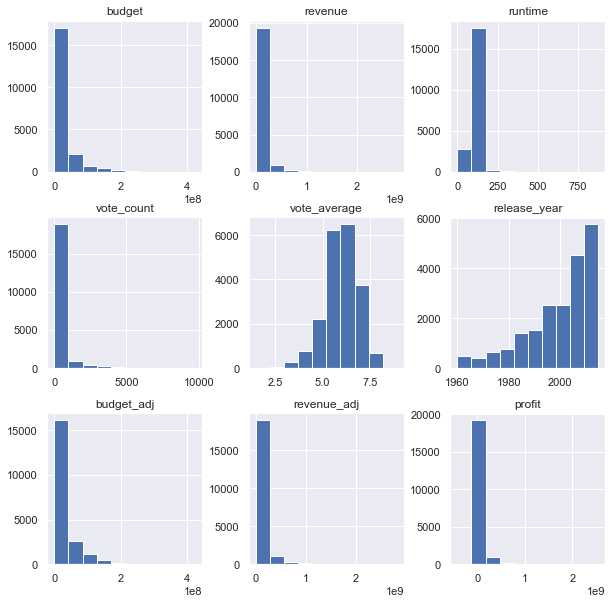

In [24]:
df.hist(figsize=(10,10));

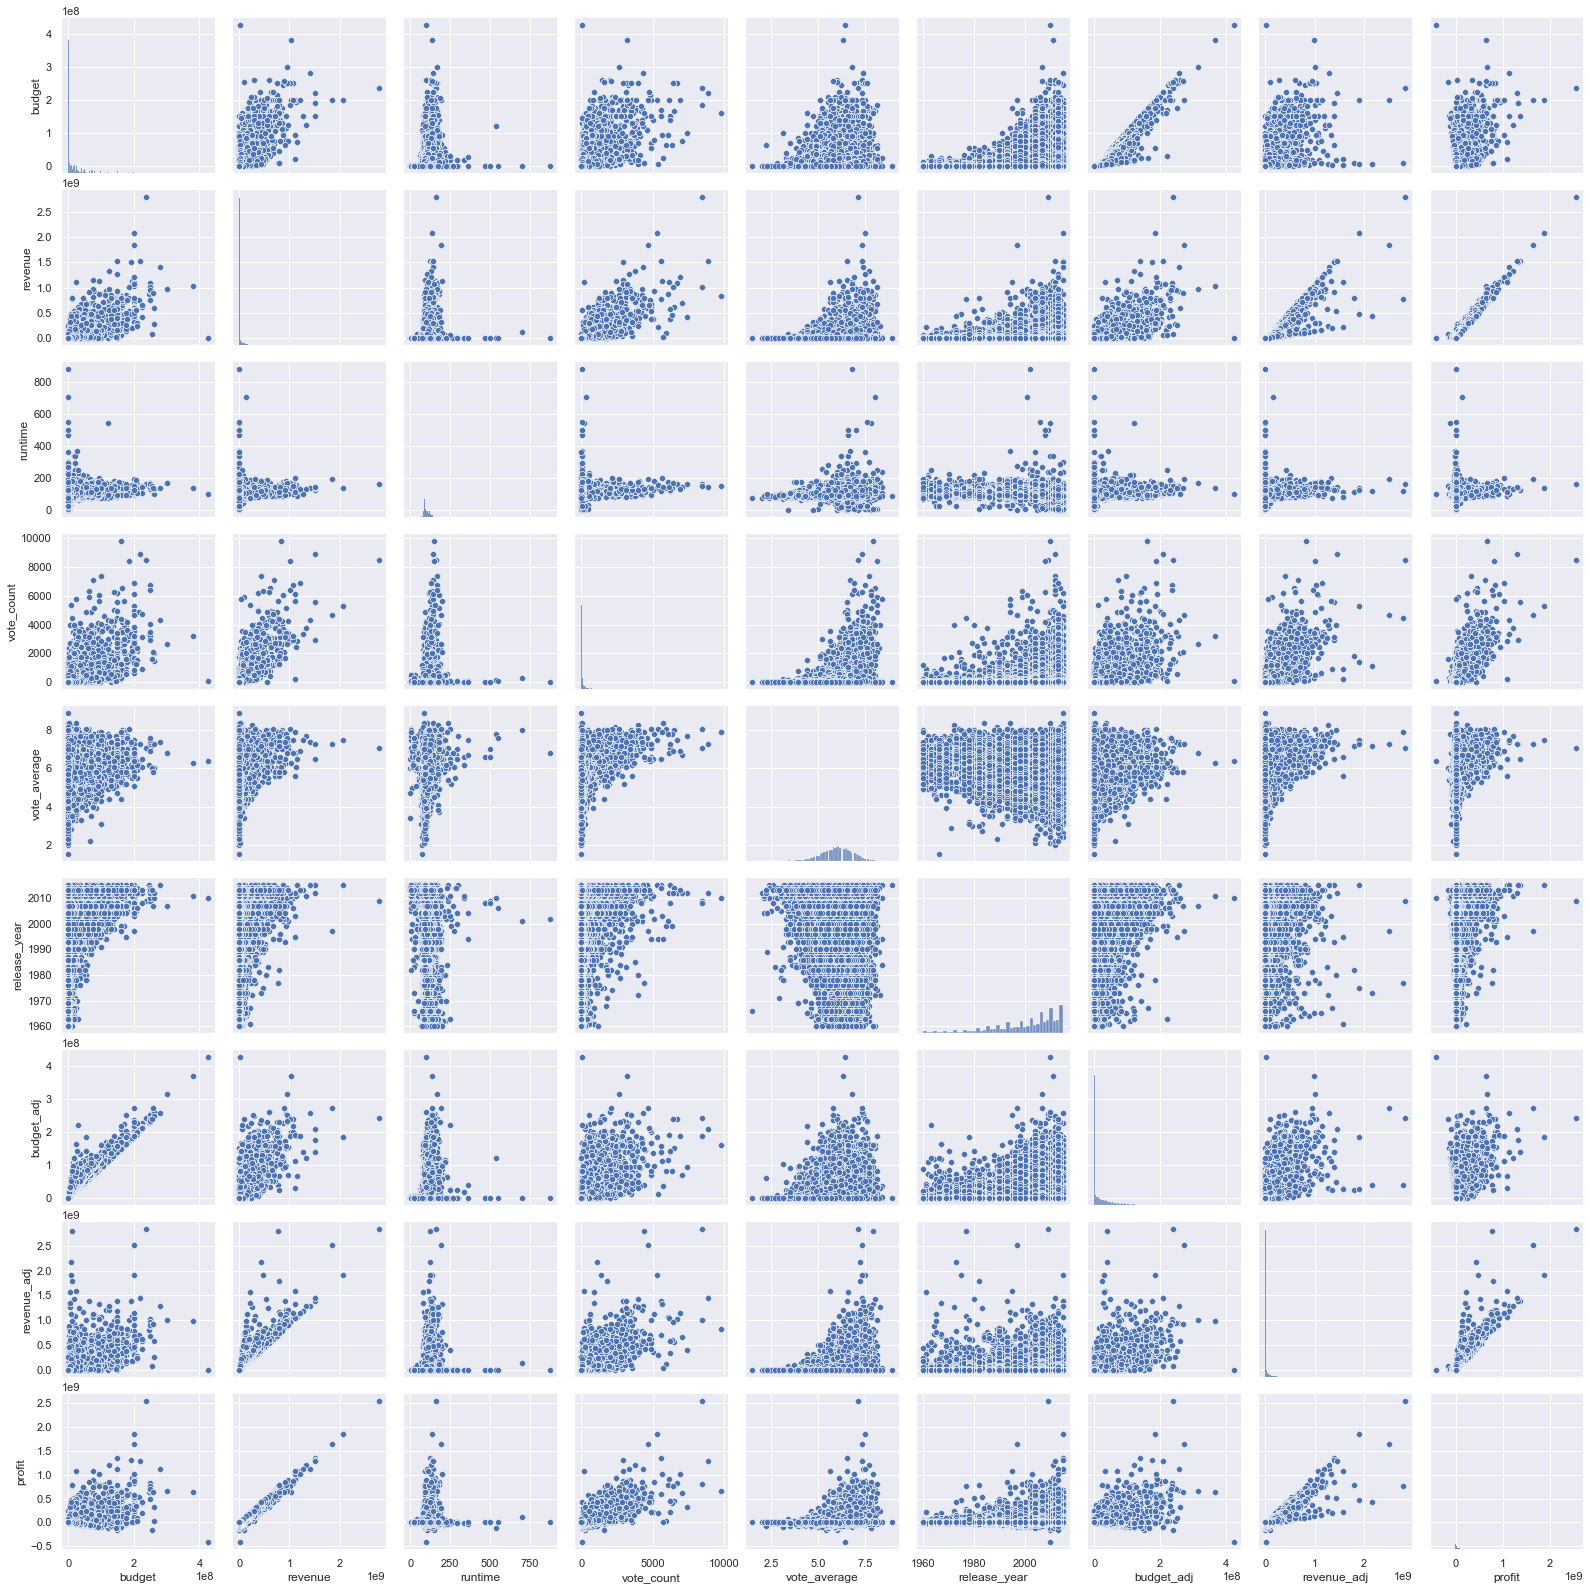

In [25]:
sns.pairplot(df, height = 2.5);

In [26]:
#I made a method to reduce the code and to be easy to read
def Show_Scatter(Horizontal,vertical):
    df.plot(x=Horizontal,y=vertical,kind='scatter' ,color='blue')
    plt.title(Horizontal +' '+ 'vs' +' ' +vertical);

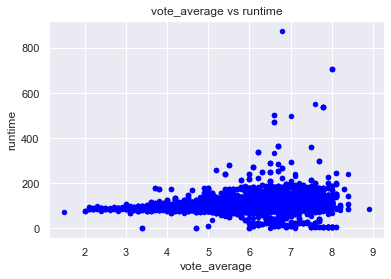

In [27]:
Show_Scatter('vote_average','runtime')

This scatter represent the relationship between vote average and runtime.

So it seems the movies that has long runtime have high vote average.

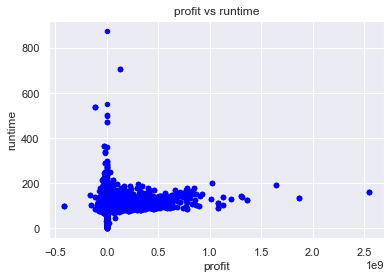

In [28]:
Show_Scatter('profit','runtime')

This scatter represent the relationship between vote average and runtime.

So it seems the movies that has long runtime do not have high revenue.

### Q1  What is the genre that has the highst average profit ?

In [29]:
#I made a method to reduce the code and to be easy to read
def Show_Bar_Chart(x,y):
    df_mean=df.groupby(x).mean()
    plt.bar(df_mean.index,df_mean[y].values)
    plt.xticks(rotation='100')
    plt.title(y + " by " + x)
    plt.ylabel(y)
    plt.xlabel(x);

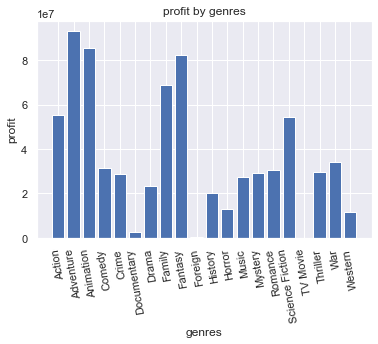

In [30]:
Show_Bar_Chart('genres','profit')

In [31]:
df.groupby('genres')['profit'].mean().sort_values(ascending=False)

genres
Adventure          9.311673e+07
Animation          8.534022e+07
Fantasy            8.221042e+07
Family             6.893398e+07
Action             5.544338e+07
Science Fiction    5.460741e+07
War                3.405830e+07
Comedy             3.152329e+07
Romance            3.063203e+07
Thriller           2.977777e+07
Mystery            2.942590e+07
Crime              2.866583e+07
Music              2.727962e+07
Drama              2.332311e+07
History            2.030398e+07
Horror             1.305872e+07
Western            1.184466e+07
Documentary        2.800515e+06
Foreign            4.688393e+05
TV Movie           1.126761e+04
Name: profit, dtype: float64

So as we noticed now that the Adventure has the highst average profit.

### Q2 What is the movie that has the highst average vote ?

In [32]:
df_sorted = df.sort_values(by='vote_average' , ascending=False)[['original_title','vote_average']]
df_sorted.drop_duplicates().head(10)

,original_title,vote_average
538,The Mask You Live In,8.9
4178,The Shawshank Redemption,8.4
7948,Stop Making Sense,8.4
2334,Rush: Beyond the Lighted Stage,8.4
609,The Jinx: The Life and Deaths of Robert Durst,8.4
7269,The Godfather,8.3
550,The Fear of 13,8.2
441,Winter on Fire: Ukraine's Fight for Freedom,8.2
9315,For All Mankind,8.2
650,Whiplash,8.2


Now those are the top 10 movies and the highst average vote movie is "The Mask You Live In".

### Q3 What is the genre that has the highst average vote ?

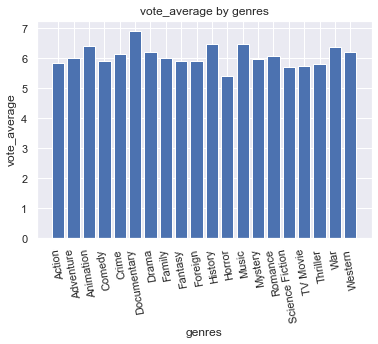

In [33]:
Show_Bar_Chart('genres','vote_average')

In [34]:
#other way to answer Q3
df.groupby('genres').mean().sort_values(by='vote_average', ascending=False)[['vote_average']]

,vote_average
genres,
Documentary,6.906641
History,6.473043
Music,6.459273
Animation,6.385167
War,6.362319
Drama,6.204317
Western,6.186232
Crime,6.139861
Romance,6.056265


So as we noticed now that the Documentary has the highst average vote.

## Conclusion

I investigat the dataset of TMDb movies and I got the answer I was looking for, So I will answer the questions:
Q1 What is the genre that has the highst average profit? 
which is Adventurethat have the highst average profit.
Q2 What is the movie that have the highst average vote? 
which is "The Mask You Live In".
Q3 What is the genre that have the highst average vote?
which is Documentary has the highst average vote.


### limitations

I faced some difficlities in splitting columns and fixing them I spent alot of time trying to split them right to deal them properly.Therefor,some columns were little amigous and the dataset it was not easy to clen also some columns have more then value,So it must be splited before I deal with it.